This is a project on predicing employee attrition in an organization. I uncovered some of the factors that lead to employee attrition and explore important questions. 



In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

In [2]:
#read data
attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
cols = attrition.columns

In [5]:
cols

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
numeric_cols = attrition._get_numeric_data()

In [7]:
numeric_cols.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
attrition.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


## Exploratory Data Analysis

In [9]:
count = attrition['Attrition'].value_counts()
count

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
employees_that_left = count[1]
employees_retained = count[0]
perc_left = (employees_that_left/(employees_retained+employees_that_left))*100
perc_retained = (employees_retained/(employees_retained+employees_that_left))*100

print('The percenatge of employees remaining is {}% while the percentage that have left is {}%'.format(perc_left,perc_retained))

The percenatge of employees remaining is 16.122448979591837% while the percentage that have left is 83.87755102040816%


In [11]:
attrition['Gender'] = attrition['Gender'].replace('Male',0)
attrition['Gender'] = attrition['Gender'].replace('Female',1)

In [12]:
attrition['Attrition'] = attrition['Attrition'].replace('Yes',1)
attrition['Attrition'] = attrition['Attrition'].replace('No',0)

In [13]:
attrition['OverTime'] = attrition['OverTime'].replace('Yes',1)
attrition['OverTime'] = attrition['OverTime'].replace('No',0)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

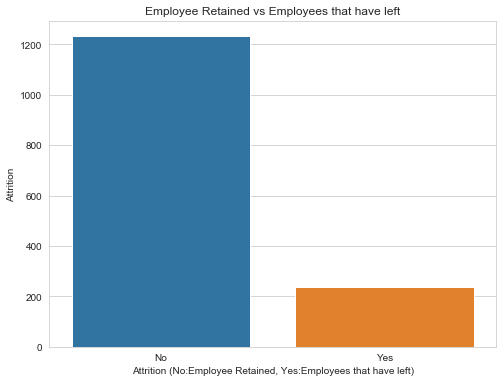

In [14]:
plt.figure(figsize=(8,6))
plt.title('Employee Retained vs Employees that have left')
sns.barplot(x=count.index, y=count)
plt.xlabel('Number of Employees')
plt.xlabel('Attrition (No:Employee Retained, Yes:Employees that have left)')
plt.tight_layout

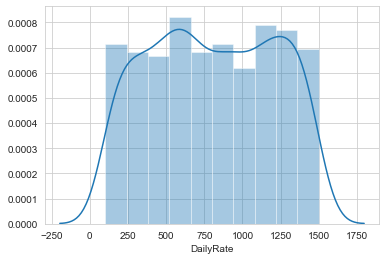

In [15]:
sns.distplot(attrition['DailyRate'], bins=10,)

From the histogram above, we see that on a daily basis, an individual makes an average between 750 - 1000 

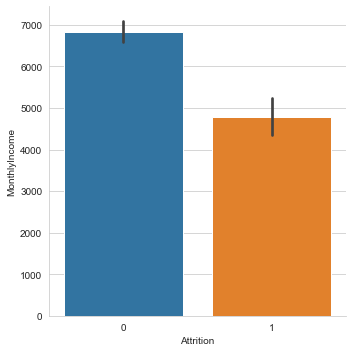

In [16]:
sns.catplot(y='MonthlyIncome', x='Attrition', data=attrition, kind='bar', orient='v')

Graph of the monthly income of employees that left against employeees that were retained. We see from the graph that:
1. Employees that left were recieving less monthly income than the people that stayed. From this, we have an intuition that one of the reason some employees left was because they are not being paid enough

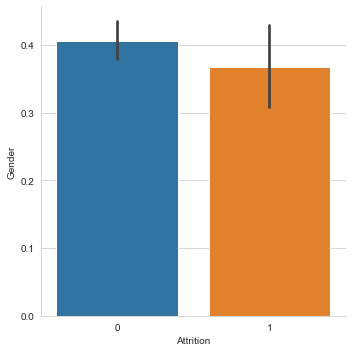

In [17]:
sns.catplot(y='Gender', x='Attrition', data=attrition, kind='bar', orient='v')

Employees that are male are most likely to quit from the graph above

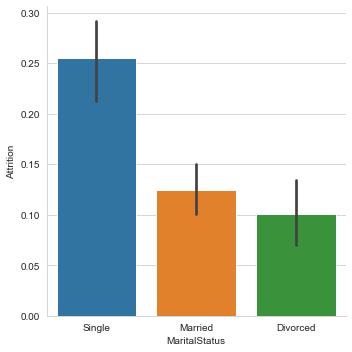

In [18]:
sns.catplot(x='MaritalStatus', y='Attrition', data=attrition, kind='bar')

From the graph above, we discover that singles are most likey to quit, followed by Married and then Divorced

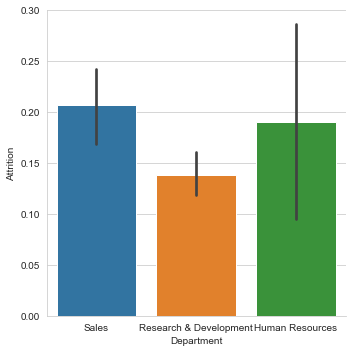

In [19]:
sns.catplot(x='Department', y='Attrition', data=attrition, kind='bar')

Sales and Human Resource deparment having a higher attrition rate 
compared to Research and Development Department

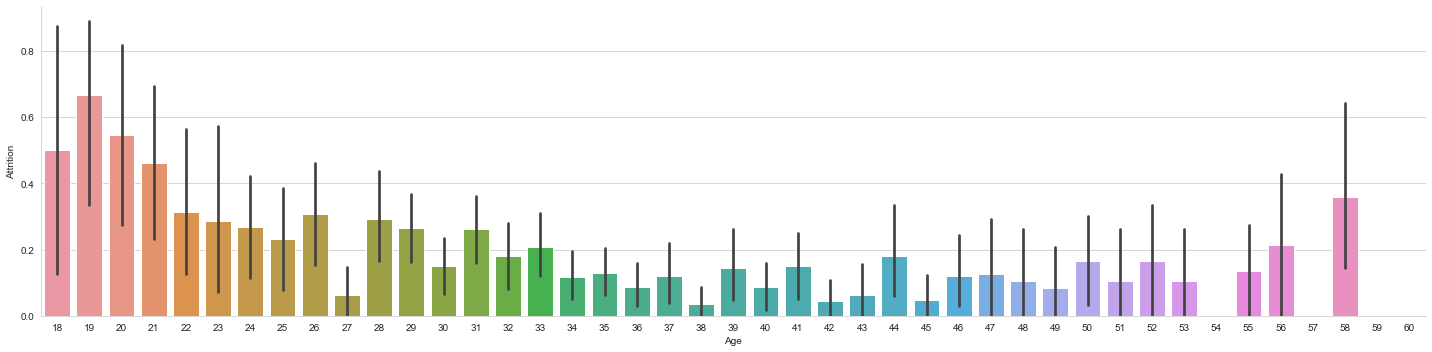

In [20]:
sns.catplot(x='Age', y='Attrition', kind='bar', data=attrition, aspect=4)

We discover that from the figure above young people (between 18 and 21) are most likely to quit

In [21]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [22]:
#This is to eliminate columns that have just one data level, i.e, they contain only one single value in their respective columns
eliminate = []
for col in attrition.columns:
    if len(attrition[col].unique()) == 1:
        eliminate.append(col)
        attrition.drop(col, inplace=True, axis=1)

In [23]:
attrition.shape

(1470, 32)

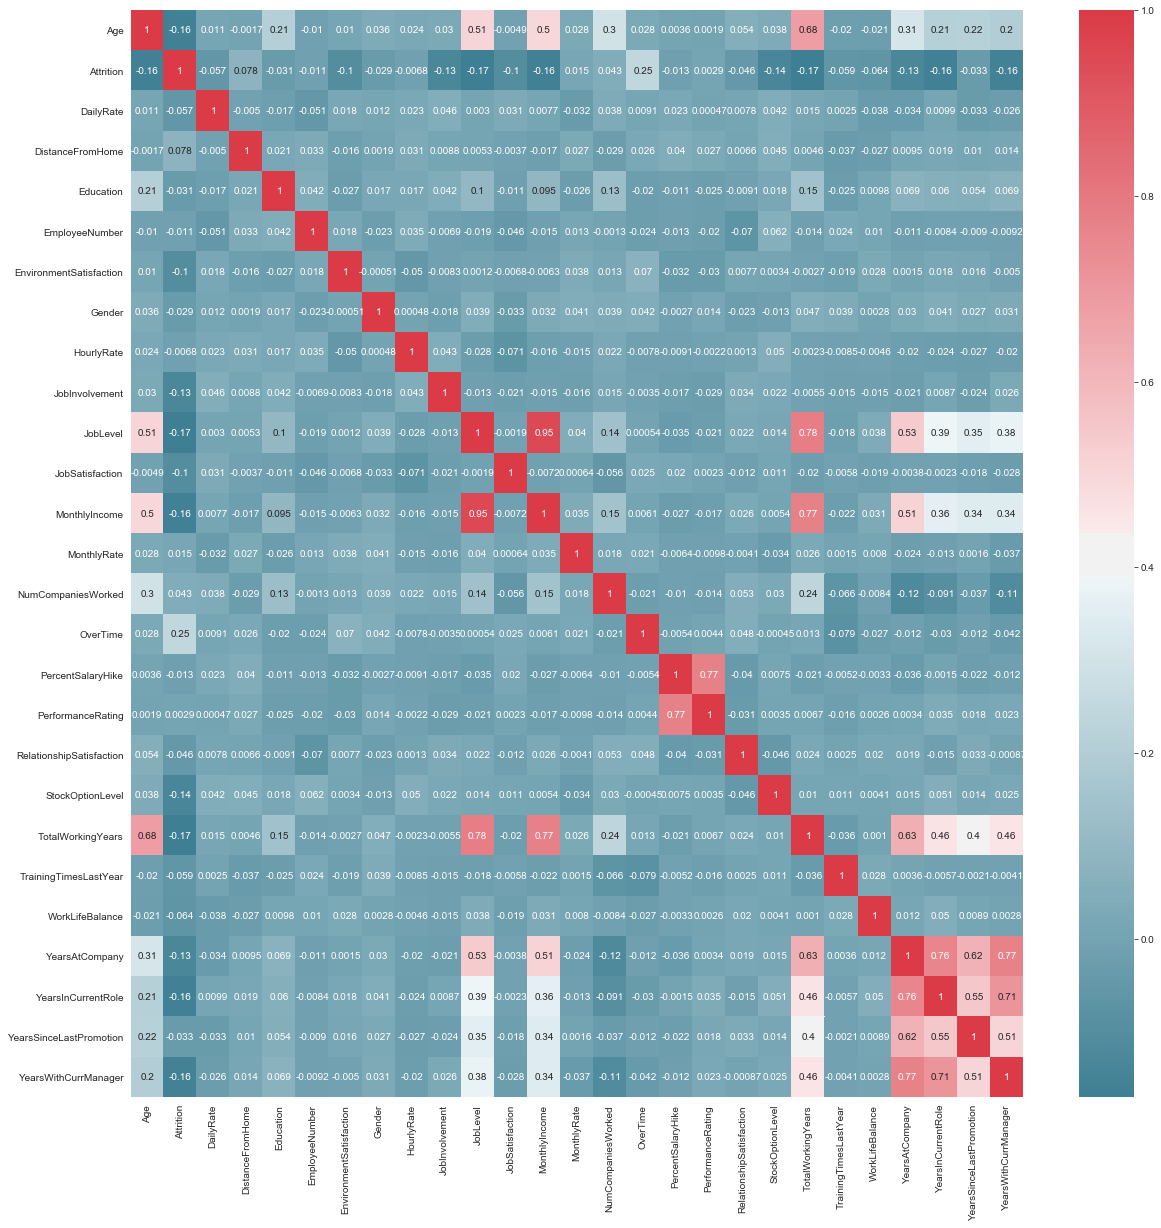

In [24]:
#Heatmap to show the correlation between numerical variables
plt.figure(figsize=(20,20))
sns.heatmap(attrition.corr(), annot=True, mask=np.zeros_like(attrition.corr(),dtype=np.bool), cmap=sns.diverging_palette(220, 10,as_cmap=True))

From the correlation matrix, we see that daily rate, hourlyrate and monthly rate are barely correlated with anything, so we would drop them

In [25]:
attrition.drop(['DailyRate', 'MonthlyRate', 'HourlyRate'], axis=1, inplace=True)

Other Conclusions from the correlation Matrix:
1. Years with current manager and years at company are highly correlated
2. Monthly income and total working years years are highly correlated
3. Years in current role and years at company are highly correlated
4. Job level and total working years are highly correlated

In [26]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [27]:
#One-hot encoding the variables
attrition_new = pd.get_dummies(attrition, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole','MaritalStatus'], drop_first=True)

In [28]:
attrition_new.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,1,2,1,3,2,4,...,0,0,0,0,0,0,1,0,0,1
1,49,0,8,1,2,3,0,2,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,2,2,4,4,0,2,1,3,...,0,1,0,0,0,0,0,0,0,1
3,33,0,3,4,5,4,1,3,1,3,...,0,0,0,0,0,1,0,0,1,0
4,27,0,2,1,7,1,0,3,1,2,...,0,1,0,0,0,0,0,0,1,0


In [29]:
X = attrition_new.drop('Attrition', axis=1)
y = attrition_new['Attrition']

In [30]:
#Importing Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [31]:
#Splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [32]:
#Spot-checking Algorithms
models = [] #Creating an empty list for the models

models.append(('LR', LogisticRegression())) #adding individual models to the empty list created
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTREE', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.765533 (0.055589)
KNN: 0.595858 (0.066890)
DTREE: 0.626689 (0.064184)
SVM: 0.538847 (0.080520)
RF: 0.819470 (0.059934)


Random Forest CLassifier had the best model when the varibles were not scaled

### Scaling the variables

In [33]:
attrition_new.head(2)

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,1,2,1,3,2,4,...,0,0,0,0,0,0,1,0,0,1
1,49,0,8,1,2,3,0,2,2,2,...,0,0,0,0,0,1,0,0,1,0


In [34]:
attrition_new.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist',

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model and Evaluation

In [36]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTREE', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.840414 (0.069202)
KNN: 0.705150 (0.072337)
DTREE: 0.627278 (0.079762)
SVM: 0.838027 (0.070892)
RF: 0.822339 (0.080764)


Logistic Regresion performed best when the varibles were scaled

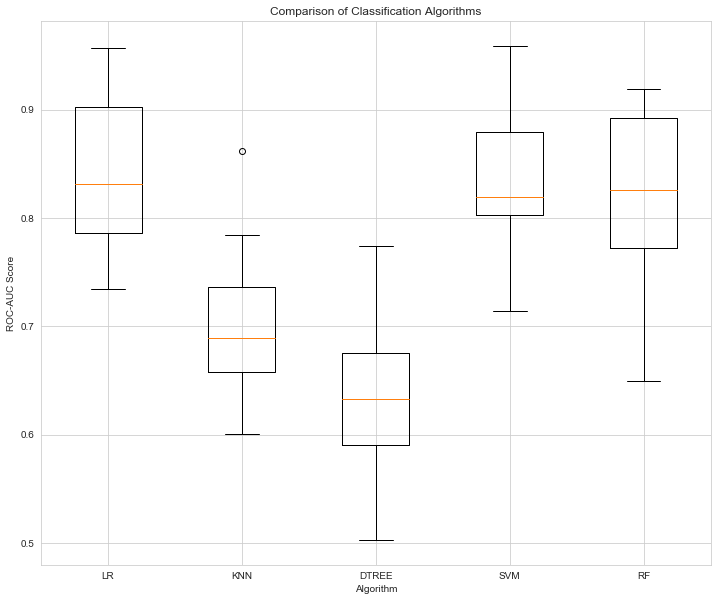

In [37]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [38]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
#Predicting off of the test set
y_pred = LR.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       249
           1       0.66      0.42      0.51        45

    accuracy                           0.88       294
   macro avg       0.78      0.69      0.72       294
weighted avg       0.86      0.88      0.87       294

